In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

import sys


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline 

# Gather data

In [3]:
train_data = pd.read_csv('data/training-data.csv', index_col='id')
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels = pd.read_csv('data/training-labels.csv', index_col='id')
train_labels.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [42]:
train = train_data.merge(train_labels, left_index=True, right_index=True)
train = train.sort_index()
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,NaN,NaN,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


In [43]:
str_cols = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 
            'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class',
            'management', 'management_group','payment', 'payment_type',
            'water_quality', 'quality_group', 'quantity', 'quantity_group',
            'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
for col in str_cols:
    train[col] = train[col].str.lower()

In [44]:
train['longitude'].replace(0, np.nan, inplace=True)
train['latitude'].replace(-2e-8, np.nan, inplace=True)

In [45]:
# JAK TO ZROBIĆ AUTOMATYCZNIE - nie ręcznie!!! funder + installer + wpt_name (all with big categories quantity)
train['funder'].replace(['germany republi'], 'germany', inplace=True)
train['funder'].replace(['acord ngo'], 'acord', inplace=True)

In [46]:
train.drop('recorded_by', axis='columns',inplace=True)

In [47]:
# unknown to Nan
# CO ZROBIĆ Z UNKNOWN - zmieniać je na NaN?!

# train['management'].replace(['unknown'], np.nan, inplace=True)
# train['management_group'].replace(['unknown'], np.nan, inplace=True)
# train['payment'].replace(['unknown'], np.nan, inplace=True)
# train['payment_type'].replace(['unknown'], np.nan, inplace=True)
# train['water_quality'].replace(['unknown'], np.nan, inplace=True)
# train['quality_group'].replace(['unknown'], np.nan, inplace=True)
# train['quantity'].replace(['unknown'], np.nan, inplace=True)
# train['quantity_group'].replace(['unknown'], np.nan, inplace=True)
train['source'].replace(['unknown', 'other'], 'unknown', inplace=True)
train['source_class'].replace(['unknown', 'other'],'unknown', inplace=True)
train['source_type'].replace(['unknown', 'other'], 'unknown', inplace=True)
#unknown

In [48]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

In [49]:
train['amount_tsh'].replace(0, np.nan, inplace=True)
train['num_private'].replace(0, np.nan, inplace=True)
train['gps_height'].replace(0, np.nan, inplace=True)
train['population'].replace(0, np.nan, inplace=True)
train['construction_year'].replace(0, np.nan, inplace=True)

In [50]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,2012-11-13,tasaf,NaN,tasaf,33.125828,-5.118154,mratibu,NaN,lake tanganyika,majengo,tabora,14,3,uyui,igalula,NaN,NaN,vwc,NaN,True,NaN,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1,NaN,2011-03-05,shipo,1978.0,shipo,34.770717,-9.395642,none,NaN,rufiji,magoda c,iringa,11,4,njombe,uwemba,20.0,True,NaN,NaN,False,2008.0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,NaN,2011-03-27,lvia,NaN,lvia,36.115056,-6.279268,bombani,NaN,wami / ruvu,songambele,dodoma,1,4,chamwino,msamalo,NaN,True,vwc,mgun,True,NaN,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3,10.0,2013-06-03,germany,1639.0,ces,37.147432,-3.187555,area 7 namba 5,NaN,pangani,urereni,kilimanjaro,3,5,hai,masama magharibi,25.0,True,water board,losaa-kia water supply,True,1999.0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,NaN,2011-03-22,cmsr,NaN,cmsr,36.164893,-6.099289,ezeleda,NaN,wami / ruvu,maata a,dodoma,1,4,chamwino,majeleko,NaN,True,vwc,NaN,True,NaN,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


# Cleaning

In [51]:
#experiments
uq = train['status_group'].unique().astype(str)
np.sort(uq)

array(['functional', 'functional needs repair', 'non functional'],
      dtype='<U23')

In [52]:
train[(train['source_type']=='other') | (train['source']=='other') | (train['source_class']=='other') 
      | (train['source_type'].isnull()) | (train['source'].isnull()) | (train['source_class'].isnull())][['source', 'source_type', 'source_class']].drop_duplicates()

,source,source_type,source_class
id,,,


In [53]:
#All funders
uq = train['funder'].unique().astype(str)
np.sort(uq)

array(['0', 'a/co germany', 'aar', 'abas ka', 'abasia',
       'abc-ihushi development cent', 'abd', 'abdala', 'abddwe', 'abdul',
       'abood', 'abs', 'aco/germany', 'acord', 'acra', 'act', 'act mara',
       'action aid', 'action contre la faim', 'action in a', 'adap',
       'adb', 'adf', 'adp', 'adp bungu', 'adp mombo', 'adp/w', 'adra',
       'af', 'afdp', 'afric', 'africa', 'africa 2000 network/undp',
       'africa amini alama', 'africa project ev germany', 'african',
       'african 2000 network', 'african barrick gold',
       'african development bank', 'african development foundation',
       'african muslim agency', 'african realief committe of ku',
       'african reflections foundation', 'african relie', 'africaone ltd',
       'africare', 'afriican reli', 'afroz ismail',
       'afya department lindi rural', 'agape churc', 'agt church',
       'ahmadia', 'ai', 'aic', 'aic church', 'aic kij', 'aict', 'aimgold',
       'aixos', 'alia', 'ambwene mwaikek', 'amref', 'amrefe'

# EDA

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df_enc.source[0]

'shallow well'

In [56]:
# filtered_df_train[label] = encoder.fit_transform(filtered_df_train[label])
df_enc = train.copy()
encoder = LabelEncoder()
df_enc['source'] = encoder.fit_transform(train['source'])
df_enc['source_type'] = encoder.fit_transform(train['source_type'])
df_enc['source_class'] = encoder.fit_transform(train['source_class'])
df_enc.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,2012-11-13,tasaf,NaN,tasaf,33.125828,-5.118154,mratibu,NaN,lake tanganyika,majengo,tabora,14,3,uyui,igalula,NaN,NaN,vwc,NaN,True,NaN,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,6,4,0,hand pump,hand pump,non functional
1,NaN,2011-03-05,shipo,1978.0,shipo,34.770717,-9.395642,none,NaN,rufiji,magoda c,iringa,11,4,njombe,uwemba,20.0,True,NaN,NaN,False,2008.0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,6,4,0,hand pump,hand pump,functional
2,NaN,2011-03-27,lvia,NaN,lvia,36.115056,-6.279268,bombani,NaN,wami / ruvu,songambele,dodoma,1,4,chamwino,msamalo,NaN,True,vwc,mgun,True,NaN,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,3,0,0,communal standpipe multiple,communal standpipe,functional
3,10.0,2013-06-03,germany,1639.0,ces,37.147432,-3.187555,area 7 namba 5,NaN,pangani,urereni,kilimanjaro,3,5,hai,masama magharibi,25.0,True,water board,losaa-kia water supply,True,1999.0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,7,5,0,communal standpipe,communal standpipe,functional
4,NaN,2011-03-22,cmsr,NaN,cmsr,36.164893,-6.099289,ezeleda,NaN,wami / ruvu,maata a,dodoma,1,4,chamwino,majeleko,NaN,True,vwc,NaN,True,NaN,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,6,4,0,hand pump,hand pump,non functional


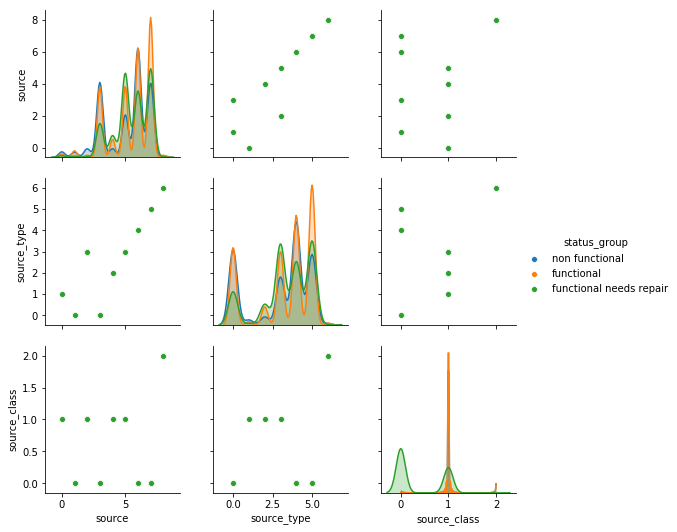

In [67]:
sns.pairplot(df_enc[['source','source_type', 'source_class', 'status_group']], hue='status_group')

In [68]:
train[['source', 'source_type', 'source_class']].drop_duplicates().sort_values(by=['source_class', 'source_type'])

,source,source_type,source_class
id,,,
2,machine dbh,borehole,groundwater
142,hand dtw,borehole,groundwater
0,shallow well,shallow well,groundwater
3,spring,spring,groundwater
124,dam,dam,surface
12,rainwater harvesting,rainwater harvesting,surface
20,river,river/lake,surface
43,lake,river/lake,surface
106,unknown,unknown,unknown
